<a href="https://colab.research.google.com/github/ashahi000/github-slideshow/blob/main/Shahi_Part_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final DSEI210 S2021 Programming Part 

Complete the notebook problems on the google colab or your home machine. Submit the your completed ipython notebook to blackboard. You may use any

## Problem 2: Ensemble Learning

For this problem you will be using a wine quality data set in **Tensor Flow** not the one in sklearn! The data set can be found here:

*Use the Tensor Flow Wine Quality Dataset: https://www.tensorflow.org/datasets/catalog/wine_quality

Amoung your other imports you can import as:

```python
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt
from seaborn import sns
import pandas as pd

ds, ds_info = tfds.load('wine_quality', split='train', with_info=True)
df = tfds.as_dataframe(ds, ds_info)
```
The Goal is to predict the quality class. Assume that "high quality" wine has a quality value greater than 5. Make a class which is "true" if the quality is greater than five.

Apply the Bagging meta-estimator of SKLEARN to an logistic regression classification, and compare with random forest, and Ada Boost Classifier along with unbagged logistic regression on the this wine dataset. Make a classification report. Make 
What is the worst class for each classifer. List testing and training results and make sure you show accuracy and AUC scores. Make bar graphs showing a comparison of these 4 classifiers.



In [ ]:
!pip install seaborn

In [24]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
tfds.list_builders()

In [26]:
ds, ds_info = tfds.load('wine_quality', split='train', with_info=True)
df = tfds.as_dataframe(ds, ds_info)


In [ ]:
df.info

In [ ]:
#Data Info
df.head()

In [29]:
df.shape

(4898, 12)

In [30]:
# checking for missing values
df.isnull().sum()

features/alcohol                 0
features/chlorides               0
features/citric acid             0
features/density                 0
features/fixed acidity           0
features/free sulfur dioxide     0
features/pH                      0
features/residual sugar          0
features/sulphates               0
features/total sulfur dioxide    0
features/volatile acidity        0
quality                          0
dtype: int64

In [ ]:
df.describe()

In [ ]:
sns.catplot(x='quality', data = df, kind = 'count')

In [ ]:
df['quality'].value_counts()

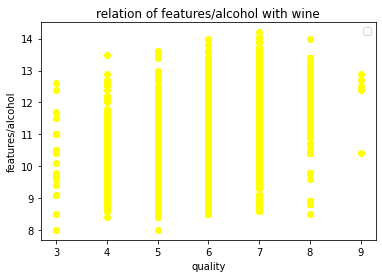

In [74]:
plt.scatter(df['quality'], df['features/alcohol'], color = 'yellow')
plt.title('relation of features/alcohol with wine')
plt.xlabel('quality')
plt.ylabel('features/alcohol')
plt.legend()
plt.show()

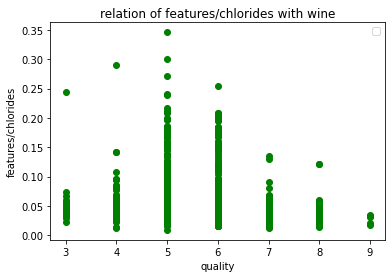

In [75]:
plt.scatter(df['quality'], df['features/chlorides'], color = 'green')
plt.title('relation of features/chlorides with wine')
plt.xlabel('quality')
plt.ylabel('features/chlorides')
plt.legend()
plt.show()

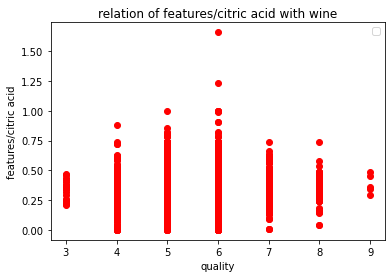

In [76]:
plt.scatter(df['quality'], df['features/citric acid'], color = 'red')
plt.title('relation of features/citric acid with wine')
plt.xlabel('quality')
plt.ylabel('features/citric acid')
plt.legend()
plt.show()

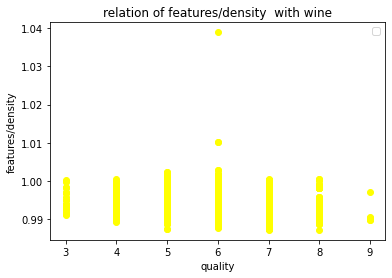

In [77]:
plt.scatter(df['quality'], df['features/density'], color = 'yellow')
plt.title('relation of features/density  with wine')
plt.xlabel('quality')
plt.ylabel('features/density')
plt.legend()
plt.show()

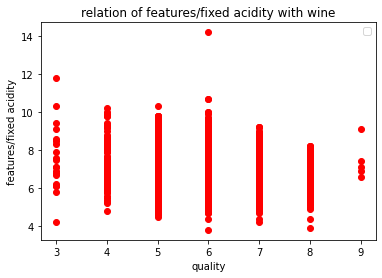

In [78]:
plt.scatter(df['quality'], df['features/fixed acidity'], color = 'red')
plt.title('relation of features/fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('features/fixed acidity')
plt.legend()
plt.show()

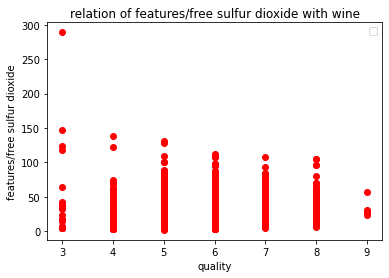

In [79]:
plt.scatter(df['quality'], df['features/free sulfur dioxide'], color = 'red')
plt.title('relation of features/free sulfur dioxide with wine')
plt.xlabel('quality')
plt.ylabel('features/free sulfur dioxide')
plt.legend()
plt.show()

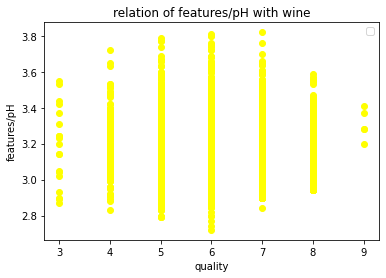

In [81]:
plt.scatter(df['quality'], df['features/pH'], color = 'yellow')
plt.title('relation of features/pH with wine')
plt.xlabel('quality')
plt.ylabel('features/pH')
plt.legend()
plt.show()


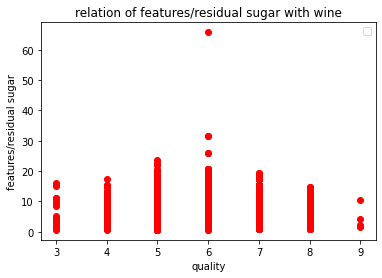

In [80]:
plt.scatter(df['quality'], df['features/residual sugar'], color = 'red')
plt.title('relation of features/residual sugar with wine')
plt.xlabel('quality')
plt.ylabel('features/residual sugar')
plt.legend()
plt.show()

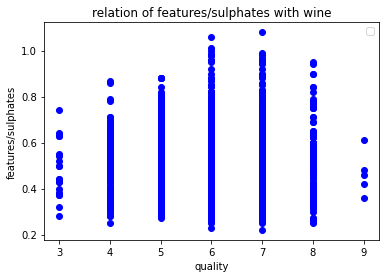

In [83]:
plt.scatter(df['quality'], df['features/sulphates'], color = 'blue')
plt.title('relation of features/sulphates with wine')
plt.xlabel('quality')
plt.ylabel('features/sulphates')
plt.legend()
plt.show()

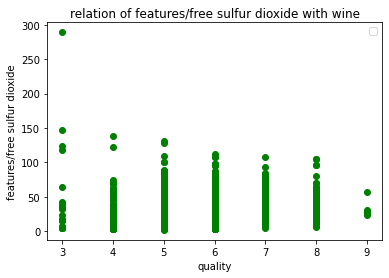

In [82]:
plt.scatter(df['quality'], df['features/free sulfur dioxide'], color = 'green')
plt.title('relation of features/free sulfur dioxide with wine')
plt.xlabel('quality')
plt.ylabel('features/free sulfur dioxide')
plt.legend()
plt.show()

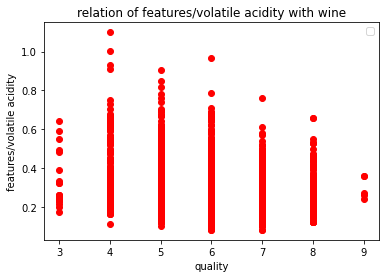

In [84]:
plt.scatter(df['quality'], df['features/volatile acidity'], color = 'red')
plt.title('relation of features/volatile acidity with wine')
plt.xlabel('quality')
plt.ylabel('features/volatile acidity')
plt.legend()
plt.show()

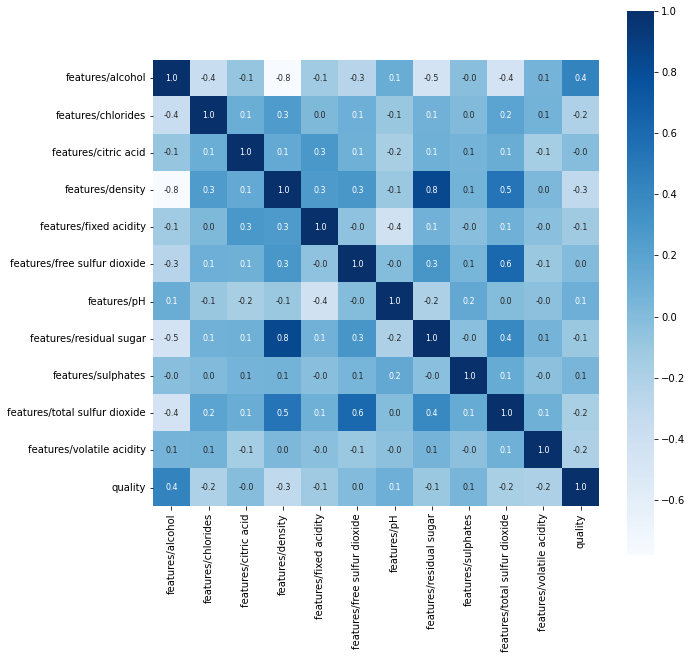

In [59]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

In [60]:
X = df.drop('quality',axis=1)

In [61]:
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [63]:
print(Y.shape, Y_train.shape, Y_test.shape)

(4898,) (3918,) (980,)


In [64]:
model = RandomForestClassifier()

In [67]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [68]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [69]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8857142857142857


In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score


model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

print(classification_report(Y_test, Y_pred))

print(confusion_matrix(Y_test, Y_pred))

Training accuracy : 0.8019397651863196
Testing accuracy : 0.7969387755102041
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       758
           1       0.62      0.26      0.37       222

    accuracy                           0.80       980
   macro avg       0.72      0.61      0.62       980
weighted avg       0.77      0.80      0.76       980

[[723  35]
 [164  58]]


In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=1))

bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)

bgclassifier.fit(X_train, Y_train)

print('Model test Score: %.3f, ' %bgclassifier.score(X_test, Y_test),
      'Model training Score: %.3f' %bgclassifier.score(X_train, Y_train))

Model test Score: 0.800,  Model training Score: 0.803


In [87]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 200)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print("Training accuracy :", model.score(X_train, Y_train))
print("Testing accuracy :", model.score(X_test, Y_test))

Training accuracy : 1.0
Testing accuracy : 0.8755102040816326


In [88]:

print(classification_report(Y_test, Y_pred))

print(confusion_matrix(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       758
           1       0.81      0.59      0.68       222

    accuracy                           0.88       980
   macro avg       0.85      0.77      0.80       980
weighted avg       0.87      0.88      0.87       980

[[728  30]
 [ 92 130]]


In [89]:
model_eval = cross_val_score(estimator = model, X = X_train, y = Y_train, cv = 10)
model_eval.mean()

0.8757046296779581